### 2021_10_19_1

## 모델 평가

### 01. 교차 검증에 대해 알아본다.
* 학습용 세트와 테스트 세트로 한번 나누는 것보다 더 안정적이고 뛰어나나 통계적 평가 방법이다.
* 데이터를 여러번 반복해서 나누고 여러 모델을 학습시킨다.
* 가장 널리 쓰이는 교차 검증 방법은 k-겹 교차 검증(k-fold cross-validation)이다.
* 보통 5 또는 10을 사용한다.

In [3]:
import os, warnings
import numpy as np

# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

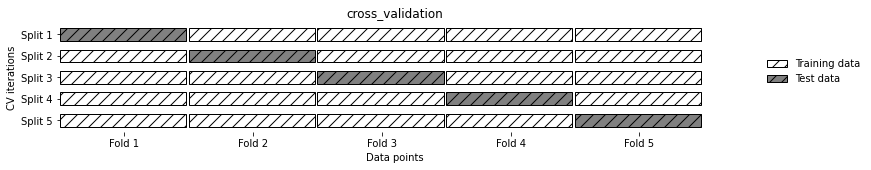

In [4]:
import mglearn

mglearn.plots.plot_cross_validation()

### 교차 검증 실습
* sklearn의 21버전은 cv(k폴더의 수)가 3으로 기본 지정
* sklearn의 22버전부터는 cv가 5로 기본 지정

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
iris = load_iris()
knn = KNeighborsClassifier()
logreg = LogisticRegression()

scores = cross_val_score(knn, iris.data, iris.target)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

### cv의 매개변수를 이용하여 폴더의 수를 3으로 하여 실습해보기

In [10]:
scores = cross_val_score(knn, iris.data, iris.target, cv = 3)
scores

array([0.98, 0.98, 0.98])

In [11]:
print("교차 검증 점수 : {:.2f}".format(scores.mean()))

교차 검증 점수 : 0.98


* 데이터를 무작위로 나눌 때 운 좋게 학습용 세트에는 분류하기 어려운 샘플이 담길 수 있다.
    * 이 경우, 테스트 세트에 분류에 좋은 샘플이 담긴다면 좋은 정확도가 얻어질 것이다.
* 반대로 훈련세트에 분류가 쉽고, 테스트 세트에 분류가 어려운 샘플이 담긴다면, 
    * 이 경우, 테스트 세트의 정확도는 낮은 결과가 나올 것이다.

### 교차 검증의 장점
* 일반화된 모델을 생성할 수 있다.
* 분할을 한번 했을 때보다 데이터를 더 효과적으로 사용이 가능하다.

### 교차 검증의 단점
* 주요 단점은 연산 비용이 늘어난다. 모델을 k개를 만들어야 하므로 데이터를 한번 나눴을 때보다 k배가 더 느리다.

### 02. 계층별 k-겹 교차 검증에 대해 알아보기
* 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것은 항상 좋지 않다.
* 아래 데이터를 순서대로 나눌 경우, 편향이 발생한다.

In [13]:
print("iris 레이블 : \n{}".format(iris.target))

iris 레이블 : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 단순한 k-겹 교차 검증은 문제가 발생한다.
* scikit-learn에서는 계층별 교차 검증을 사용한다.
* 계층별 교차 검증 : stratified k-fold cross-validation

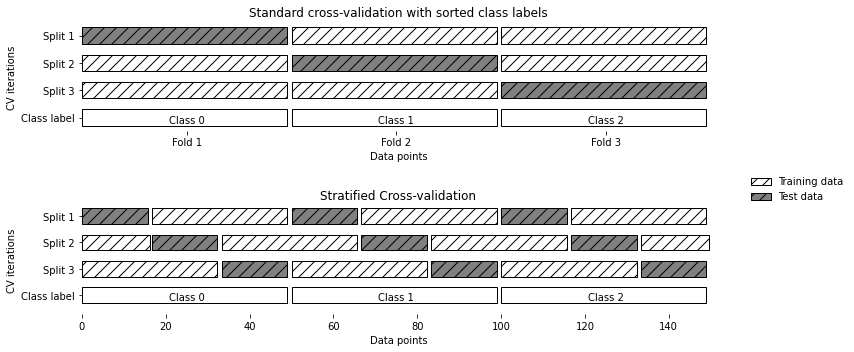

In [14]:
mglearn.plots.plot_stratified_cross_validation()

* 폴더 안에 클래스의 비율이 같도록 데이터를 나눈다.
* 대부분의 경우 회귀에서는 k-겹 교차 검증을 사용한다.
* 분류에서는 계층별 k-겹 교차 검증의 기본값이 잘 동작한다.
* model_selection 모듈에서 KFold 분할기를 임포트하고 원하는 폴더 수를 넣어 객체를 생성한다.

### iris 데이터 셋에서 3겹 교차 검증을 사용할 때, 점수가 0이 된다.

In [15]:
from sklearn.model_selection import KFold

In [19]:
kfold = KFold(n_splits = 3)
scores = cross_val_score(knn, iris.data, iris.target, cv = kfold)
print("교차 검증 점수 : \n{}".format(scores))

교차 검증 점수 : 
[0. 0. 0.]


### 계층별 폴더를 만드는 대신에 샘플의 순서를 뒤죽박죽을 섞기
* shuffle = True

In [20]:
kfold = KFold(n_splits = 3, shuffle = True)
scores = cross_val_score(knn, iris.data, iris.target, cv = kfold)
print("교차 검증 점수 : \n{}".format(scores))

교차 검증 점수 : 
[0.96 0.96 0.98]


In [22]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
knn.fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv = kfold)
print("교차 검증 점수 : \n{}".format(scores))

교차 검증 점수 : 
[0.94736842 0.97297297 0.91891892]
